In [79]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats

plt.style.use('ggplot')

In [177]:
# Initial Data Read

df = pd.read_csv('train.csv')

# Categorical Data Label Dictionaries
color = pd.read_csv('color_labels.csv')
breed = pd.read_csv('breed_labels.csv')
state = pd.read_csv('state_labels.csv')
typedic = {1:'dog', 2:'cat'}
genderdic = {1:'Male', 2:'Female', 3:'Mixed'}
maturitydic = {1:'Small', 2:'Medium', 3:'Large', 4:'Extra Large', 0:'Not Specified'}
furdic = {1:'Short', 2:'Medium', 3:'Long', 4:'Not Specified'}
vaccdic = {1:'Vaccinated', 2:'Not Vaccinated', 3:'No Info'}
wormdic = {1:'De-wormed', 2:'Not de-wormed', 3:'No Info'}
sterildic = {1:'Sterilized', 2:'Not sterilized', 3:'No Info'}
healthdic = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}
adoptiondic = {0:  'First Day', 1: '1-7 Days', 2: '8-30 Days', 3:'31-90 Days', 4:'No Adoption'}

df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [178]:
# Next 3 cells are for defining data properties, shape, size and desriptives.

list(df.columns)

['Type',
 'Name',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'RescuerID',
 'VideoAmt',
 'Description',
 'PetID',
 'PhotoAmt',
 'AdoptionSpeed']

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [180]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [181]:
# Most data was categorical and didn't give much information. These variables sliced
# categorical descriptives checked.

categoricals = [df.Type, df.Gender, df.Color1, df.Color2, df.Color3, df.MaturitySize, df.FurLength, df.Vaccinated, df.Dewormed, df.Sterilized, df.Health, df.VideoAmt, df.PhotoAmt, df.AdoptionSpeed]

categoricals = pd.DataFrame(categoricals).T

print(categoricals.head(2))

print(categoricals.describe())

   Type  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  \
0   2.0     1.0     1.0     7.0     0.0           1.0        1.0         2.0   
1   2.0     1.0     1.0     2.0     0.0           2.0        2.0         3.0   

   Dewormed  Sterilized  Health  VideoAmt  PhotoAmt  AdoptionSpeed  
0       2.0         2.0     1.0       0.0       1.0            2.0  
1       3.0         3.0     1.0       0.0       2.0            0.0  
               Type        Gender        Color1        Color2        Color3  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614      1.776162      2.234176      3.222837      1.882012   
std        0.498217      0.681592      1.745225      2.742562      2.984086   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      0.000000   
50%        1.000000      2.000000      2.000000      2.000000      0.000000   

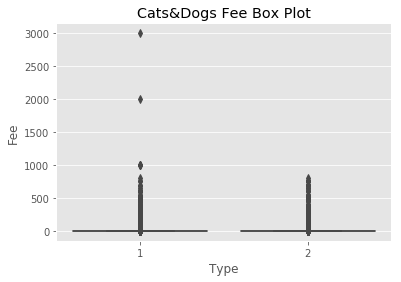

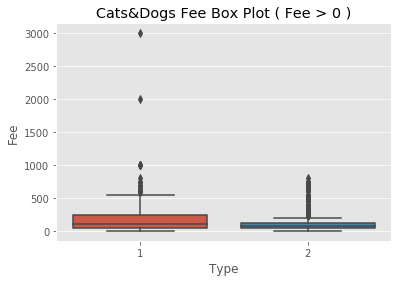

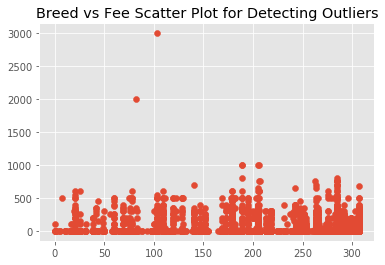

In [182]:
sns.boxplot(x=df.Type, y=df.Fee)
plt.title('Cats&Dogs Fee Box Plot')
plt.show()
sns.boxplot(x=df.Type, y=df[df.Fee > 0].Fee)
plt.title('Cats&Dogs Fee Box Plot ( Fee > 0 )')
plt.show()
plt.scatter(x=df.Breed1, y=df.Fee)
plt.title('Breed vs Fee Scatter Plot for Detecting Outliers')
plt.show()

# There are only couple of data pointsfor dogs, can be accepted as outliers, although outliers seems pretty random, needs special attention. Especially two data point shows clear outlier figures.

In [183]:
df[df.Fee >= 1000]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2078,1,Rottweiler - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Open for Adoption with Fees Looking for new lo...,ecad98f44,1.0,2
4844,1,Coda,7,206,0,2,6,7,0,3,...,1,1,1000,41335,d2a7c2889579271a07100d5668f5cf8f,0,She is pure breed Siberian husky. Born at July...,0038c9343,5.0,2
8722,1,Khaleesi And Drogo,4,103,0,3,1,2,0,3,...,1,2,3000,41325,39d5c79a7422fa53b8fdeaec67b3dbda,0,Both pups are family home trained. They love t...,e74dd0579,5.0,3
8834,1,Adpoted,24,205,0,2,1,2,7,1,...,1,1,1000,41401,67f04f1dc1f81ff09e134fb47a053b10,0,adpoted,aebf47483,2.0,0
8879,1,Rottweiler Semi-Adult - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Looking for new lovely home due to owner lack ...,c3b94defa,2.0,1
10477,1,Bull Dog,24,82,0,1,2,5,7,2,...,1,1,2000,41401,a1c7a4f20bb936fcb8d97039741c40be,0,Found this bull dog near my neighbourhood for ...,31a77d7ba,3.0,1


# There are 6 observations outliers for the price variable.

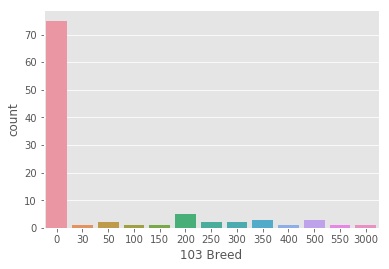

Priced pet cost average:  390.43 (Free pets are excluded)
Priced pet cost median:  250.0 (Free pets are excluded)


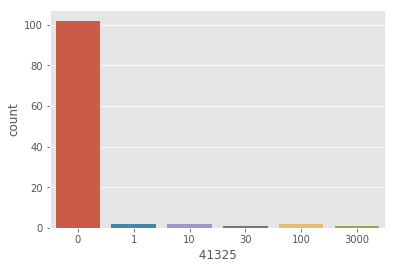

Priced pet cost average:  406.5 (Free pets are excluded)
Priced pet cost median:  20.0 (Free pets are excluded)


In [184]:
# $3000 outlier detail look.

sns.countplot(df[df.Breed1 == 103].Fee)
plt.xlabel(' 103 Breed ')
plt.show()

df103 = df[df.Breed1 == 103]
print('Priced pet cost average: ', round(df103[df103.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df103[df103.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41325].Fee)
plt.xlabel(' 41325 ')
plt.show()

df41325 = df[df.State == 41325]
print('Priced pet cost average: ', round(df41325[df41325.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41325[df41325.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Graphs shows that for both 103 coded breed and state 41325 have no data points showing that 3000 is acceptable data observation, this point is clearly an outlier.

# Among 103 breed, although most of the pets are free, the ones with adoption fees are between 30 - 550, 

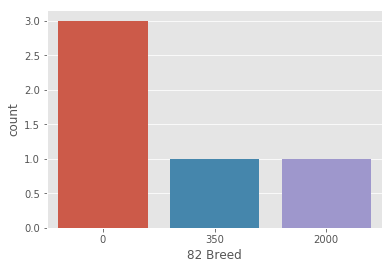

Priced pet cost average:  1175.0 (Free pets are excluded)
Priced pet cost median:  1175.0 (Free pets are excluded)


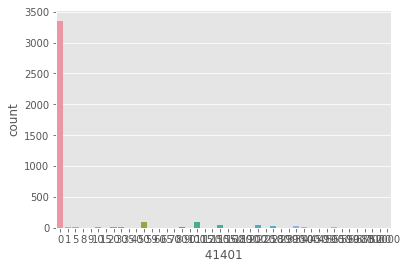

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [185]:
# $2000 outlier detail look.

sns.countplot(df[df.Breed1 == 82].Fee)
plt.xlabel(' 82 Breed ')
plt.show()

df82 = df[df.Breed1 == 82]
print('Priced pet cost average: ', round(df82[df82.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df82[df82.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Countplot shows that there are only two 82 coded Breed dogs available in the data set and one is without fee, other is 2000. The state wise pet prices are not high either, with mean 139.6 and median 100. 2000 fee can be accepted as outlier.

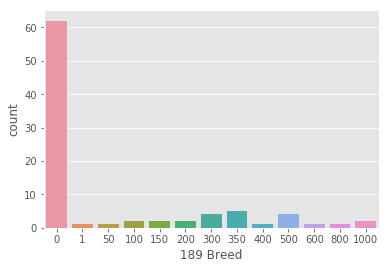

Priced pet cost average:  373.12 (Free pets are excluded)
Priced pet cost median:  350.0 (Free pets are excluded)


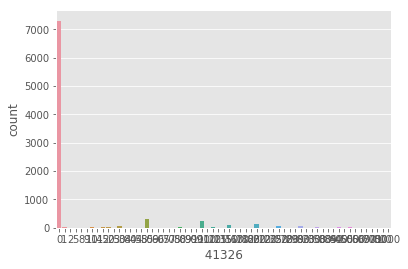

Priced pet cost average:  139.91 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [186]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 189].Fee)
plt.xlabel(' 189 Breed ')
plt.show()

df189 = df[df.Breed1 == 189]
print('Priced pet cost average: ', round(df189[df189.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df189[df189.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41326].Fee)
plt.xlabel(' 41326 ')
plt.show()

df41326 = df[df.State == 41326]
print('Priced pet cost average: ', round(df41326[df41326.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41326[df41326.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 189 breed prices are somewhat equally spreaded from 1 to 1000 and has a mean of 375 and median of 300. Among the same breed 1000 case might be real observation.
# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

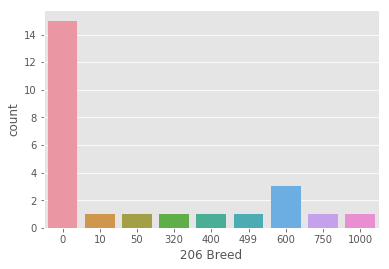

Priced pet cost average:  482.9 (Free pets are excluded)
Priced pet cost median:  549.5 (Free pets are excluded)


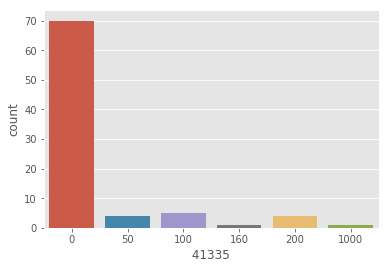

Priced pet cost average:  177.33 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [187]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 206].Fee)
plt.xlabel(' 206 Breed ')
plt.show()

df206 = df[df.Breed1 == 206]
print('Priced pet cost average: ', round(df206[df206.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df206[df206.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41335].Fee)
plt.xlabel(' 41335 ')
plt.show()

df41335 = df[df.State == 41335]
print('Priced pet cost average: ', round(df41335[df41335.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41335[df41335.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 206 breed prices are somewhat equally spreaded from 50 to 1000 and has a mean of 535 and median of 600. Among the same breed 1000 case might be real observation.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

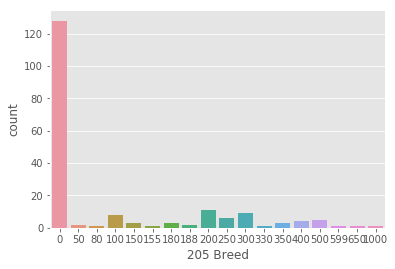

Priced pet cost average:  268.23 (Free pets are excluded)
Priced pet cost median:  225.0 (Free pets are excluded)


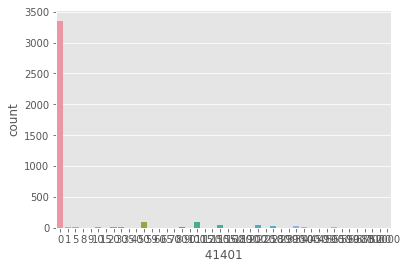

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [188]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 205].Fee)
plt.xlabel(' 205 Breed ')
plt.show()

df205 = df[df.Breed1 == 205]
print('Priced pet cost average: ', round(df205[df205.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df205[df205.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 205 breed prices are somewhat  spreaded from 100 to 1000 and has a mean of 337 and median of 300. Among the same breed 1000 case might be real outlier.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can be counted as outlier. But decision needs to be made.

# Among all possible outliers in Fee variable, only two records will be discarded as recordin errors.

In [189]:
# Outliers in Fee variable are excluded.

df = df[df.Fee <= 1000]
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


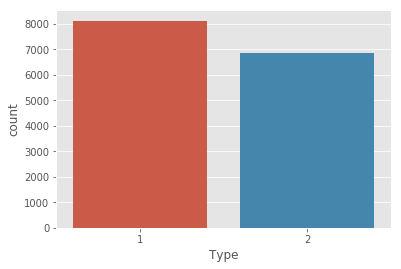

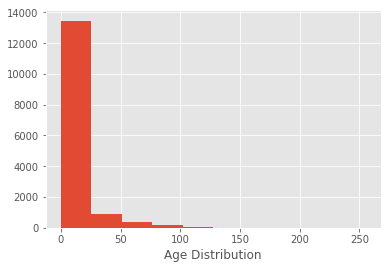

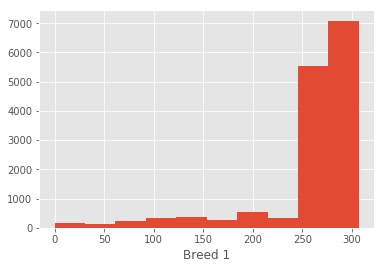

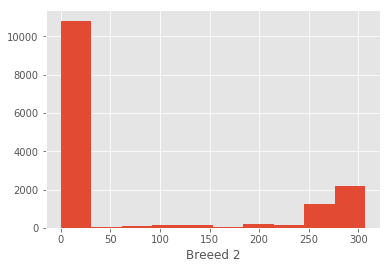

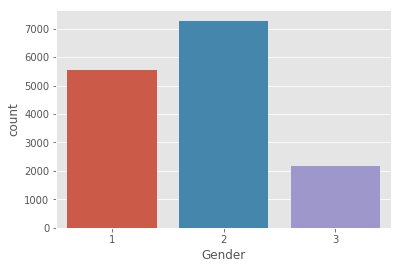

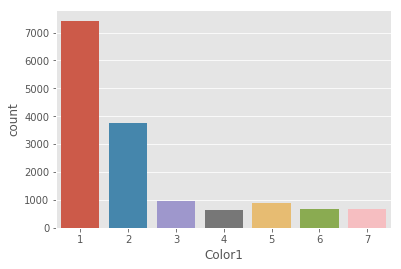

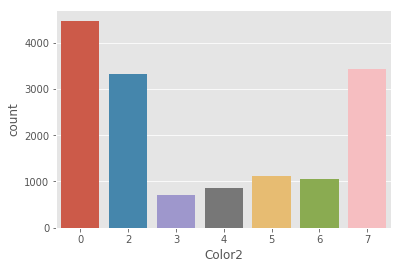

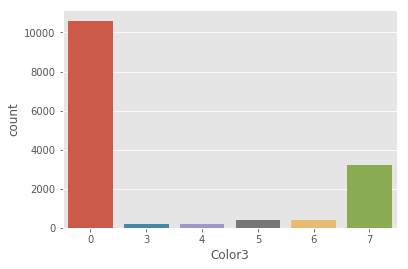

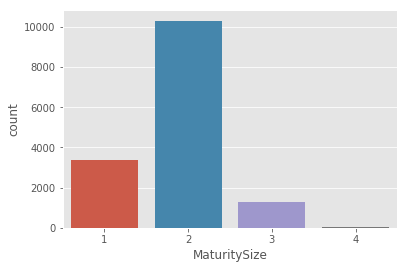

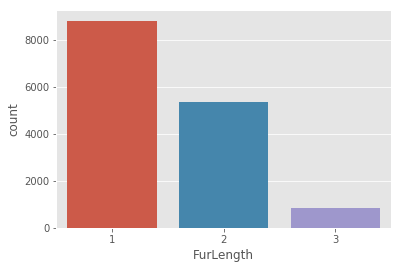

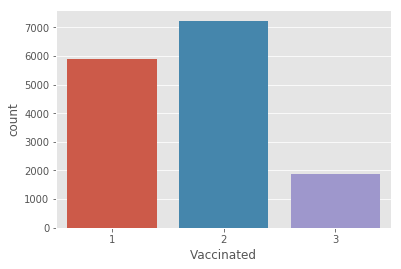

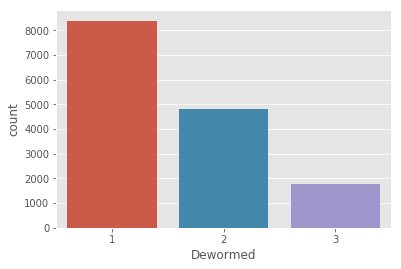

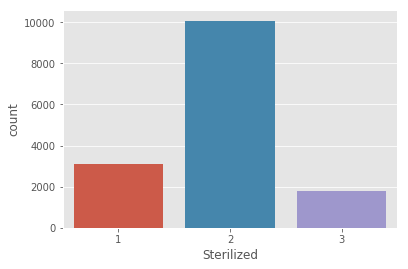

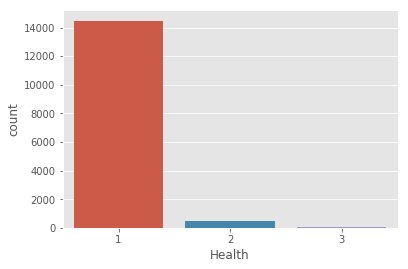

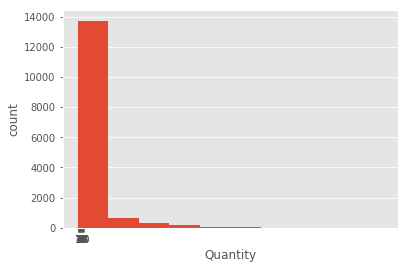

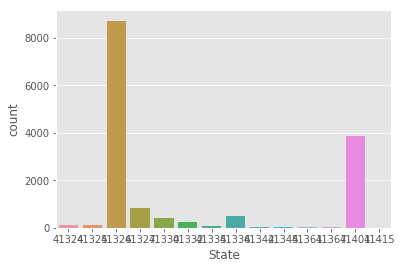

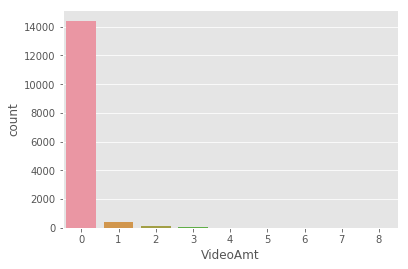

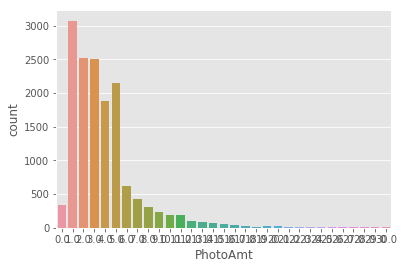

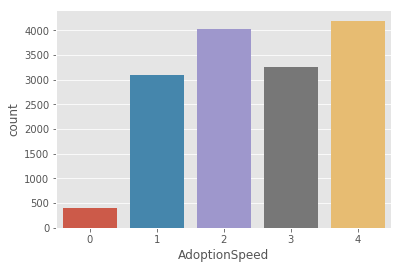

In [190]:
# Visual EDA, count plots for all variables. 
# Checking for imbalanced, skewed data. Detecting outliers.

j1 = sns.countplot(df.Type)
j1 = plt.show()
j2 = plt.hist(df.Age)
j2 = plt.xlabel('Age Distribution')
j2 = plt.show()
j3 = plt.hist(df.Breed1)
j3 = plt.xlabel('Breed 1')
j3 = plt.show()
j4 = plt.hist(df.Breed2)
j4 = plt.xlabel('Breeed 2')
j4 = plt.show()

for i in df.columns[5:16]:
    plt.figure()
    sns.countplot(df[i])

j5 = plt.hist(df.Fee)
j5 = plt.show()
j6 = sns.countplot(df.State)
j6 = plt.show()
j7 = sns.countplot(df.VideoAmt)
j7 = plt.show()

for i in df.columns[22:24]:
    plt.figure()
    sns.countplot(df[i])


## Age looks like exponential distribution, most of the pets rescued are puppies or kittens. There are extreme points 225 months old. 
# Outlier inspection is needed.

## Breed is highly complex and skewed. Most of the breeds are either, mixed breeds or unknown. 
# Upon further analyse, mixed breeds label might be disgregarded.

## Not all pets have secondary and third colors. First color variable is from 1-7, other 2 color variables has big pile on color code 0.
# This also needs to be taken into consideration, for further analyses.

## MaturitySize might have an outlier, most of the data is coded for the first three codes.

## Health also has couple extereme codes, might be an outlier.

## Quantity variable has almost no distribution. Almost all pets are only one.

## Statewise distribution is imbalanced. Might have demographic or economic reasons behind.

## Almost no pets have video.

## Picture amount varies but there might be extreme cases.

## Adoption speed seems consistent. But PetSaver focuses on identifying adoption logic and increasing the speed of adoption.

In [191]:
# For computational ease, string variables are seperated.

df = df.drop(['Name', 'Description', 'RescuerID', 'PetID'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14991 entries, 0 to 14992
Data columns (total 20 columns):
Type             14991 non-null int64
Age              14991 non-null int64
Breed1           14991 non-null int64
Breed2           14991 non-null int64
Gender           14991 non-null int64
Color1           14991 non-null int64
Color2           14991 non-null int64
Color3           14991 non-null int64
MaturitySize     14991 non-null int64
FurLength        14991 non-null int64
Vaccinated       14991 non-null int64
Dewormed         14991 non-null int64
Sterilized       14991 non-null int64
Health           14991 non-null int64
Quantity         14991 non-null int64
Fee              14991 non-null int64
State            14991 non-null int64
VideoAmt         14991 non-null int64
PhotoAmt         14991 non-null float64
AdoptionSpeed    14991 non-null int64
dtypes: float64(1), int64(19)
memory usage: 3.0 MB


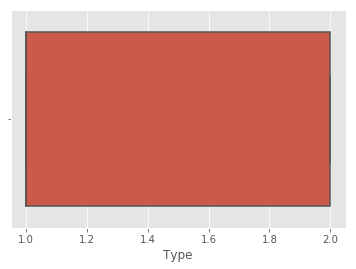

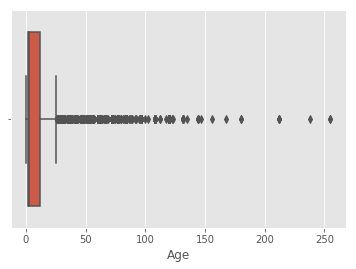

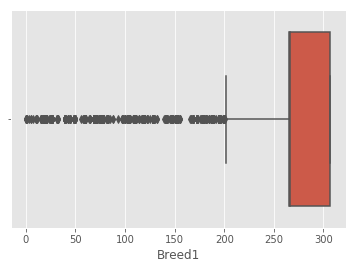

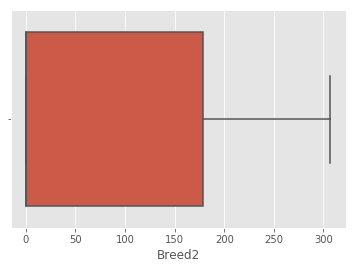

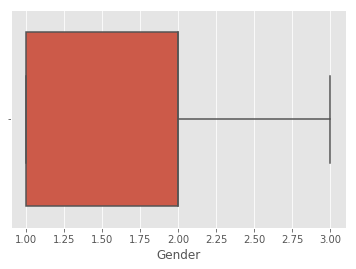

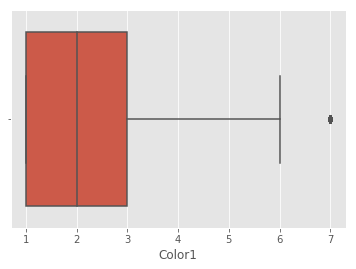

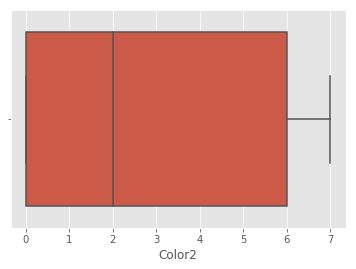

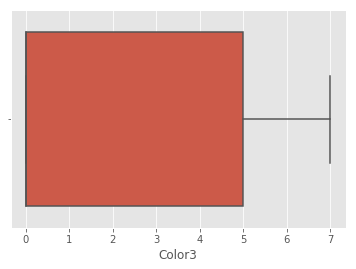

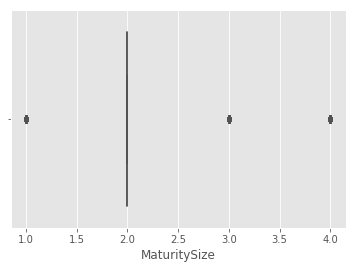

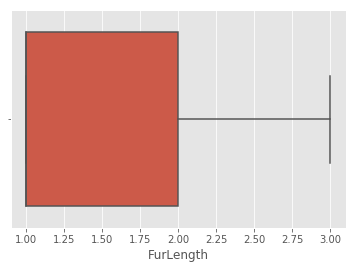

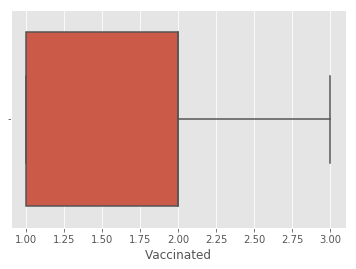

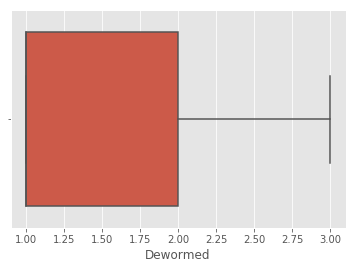

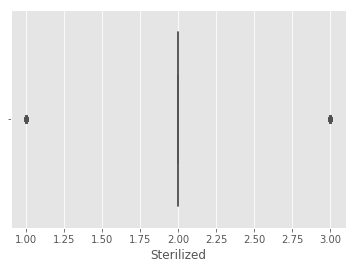

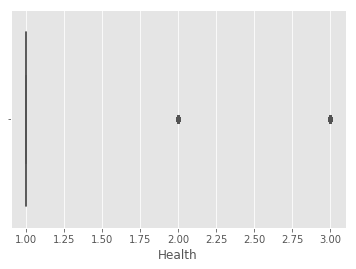

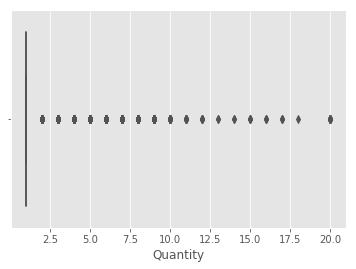

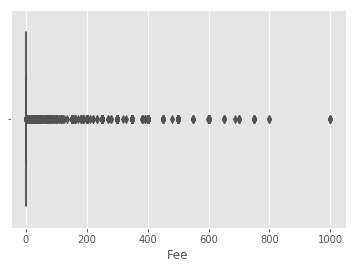

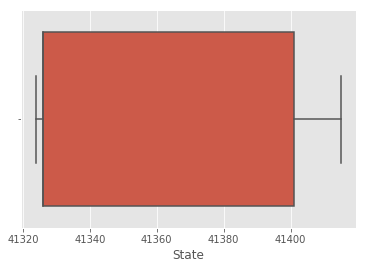

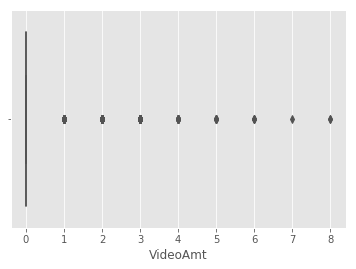

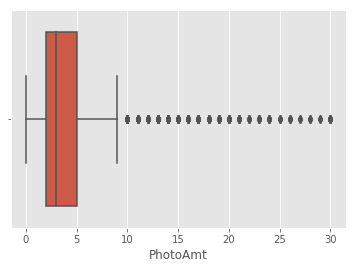

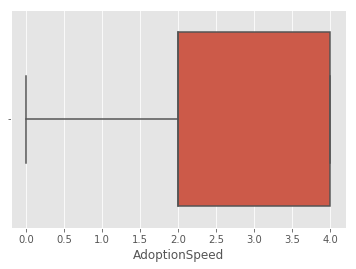

In [192]:
# Boxplots for more in depth visualizations to detect outliers.
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()



## Since most pets are puppies or kittens, as we identified on the count plots, there are extreme cases in the data. There are too many cases above the IQR, this is because our data is highly skewed. Outliers should be defined with domain knowledge and statistical sense.

## As in the count plots, cumulation towards mixed breeds, holds the IQR on these breed codes.

## Since not too many pets have 2nd breed this data is also, tricky to use.

# Not many boxplots are meaningful, since there are 3 possible cases and all coded accordingly. But this is auto generated plotting, only meaningful plots are taken into consideration.

## Photo amount has some extreme cases, might be labeled as outliers. Count plot also supports.

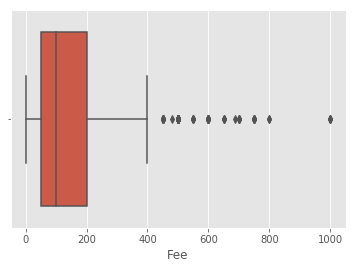

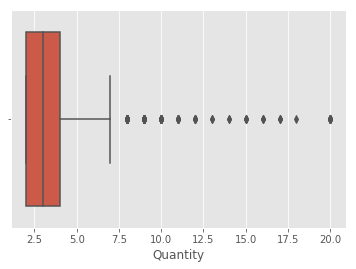

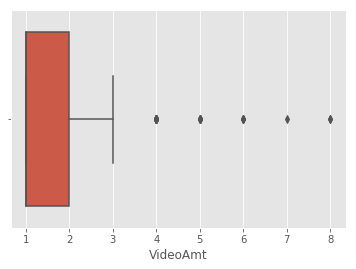

In [193]:
# It seems data has no missing points but some codings are effecting our judgement. For some highly effected variables,
# zero coded cases are treated as missing data points and boxplots are checked for outlie, detection.

sns.boxplot(df[df.Fee > 0].Fee)
plt.show()
sns.boxplot(df[df.Quantity > 1].Quantity)
plt.show()
sns.boxplot(df[df.VideoAmt > 0].VideoAmt)
plt.show()

# Although 1000 data points for price didn't considered as outliers. Non-free price plot also indicates that there are quite some extreme prices, and we will re-evaluate our outlier borders for FEE variable.

# Most of the pets are unique and only one of its kind. Although, above box-plot excluded single pets, there are extreme values.

# Almost all of the data had no VideoAmt, when we exclude 0 cases, there are still couple extreme cases.

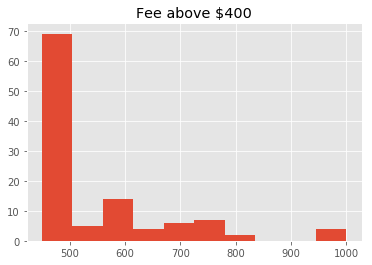

Fee > 400 Count:  111
Fee > 500 Count:  42
Fee > 600 Count:  23
Fee > 700 Count:  13
Fee > 800 Count:  4
Fee > 900 Count:  4
Fee > 1000 Count:  0


In [194]:
# Outliers in the Fee variable.

plt.hist(df[df.Fee > 400].Fee)
plt.title('Fee above $400')
plt.show()

print('Fee > 400 Count: ',df[df.Fee > 400].Fee.count())
print('Fee > 500 Count: ',df[df.Fee > 500].Fee.count())
print('Fee > 600 Count: ',df[df.Fee > 600].Fee.count())
print('Fee > 700 Count: ',df[df.Fee > 700].Fee.count())
print('Fee > 800 Count: ',df[df.Fee > 800].Fee.count())
print('Fee > 900 Count: ',df[df.Fee > 900].Fee.count())
print('Fee > 1000 Count: ',df[df.Fee > 1000].Fee.count())

# $600 seems another good cut point but to be conservative only $1000 cases will be marked as outliers and removed.

df = df[df.Fee < 1000]

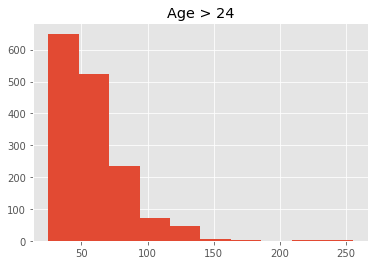

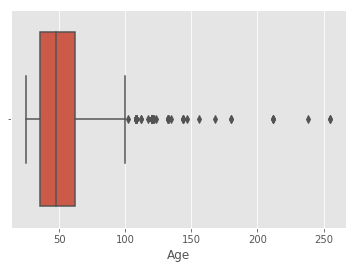

Age > 100 Count:  84
Age > 150 Count:  10
Age > 200 Count:  6
Age > 250 Count:  2


In [195]:
# Outliers in the Age variable.

plt.hist(df[df.Age > 24].Age)
plt.title('Age > 24')
plt.show()
sns.boxplot(df[df.Age > 24].Age)
plt.show()

print('Age > 100 Count: ', df[df.Age > 100].Age.count())
print('Age > 150 Count: ', df[df.Age > 150].Age.count())
print('Age > 200 Count: ', df[df.Age > 200].Age.count())
print('Age > 250 Count: ', df[df.Age > 250].Age.count())

# 100 months old, seems a good cutpoint but 150 months will be defined as outlier threshold.

df = df[df.Age < 150]

In [196]:
# Outliers in Maturity Size

for i, j in maturitydic.items():
    count = df[df.MaturitySize == i].MaturitySize.count()
    perc = round(count/len(df.MaturitySize),3)
    print(j, ' Count: ', count, ' -- Percentage : ', perc )
    
    
# Since Extra Large is really small percantage of the data it seperates from the others.

df = df[df.MaturitySize < 4]

Small  Count:  3393  -- Percentage :  0.227
Medium  Count:  10295  -- Percentage :  0.687
Large  Count:  1256  -- Percentage :  0.084
Extra Large  Count:  33  -- Percentage :  0.002
Not Specified  Count:  0  -- Percentage :  0.0


In [197]:
# Outliers in Health

for i, j in healthdic.items():
    count = df[df.Health == i].Health.count()
    perc = round(count/len(df.Health),3)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)
    
# Serious Injuries covers small percantage of the data and is outlier.

df = df[df.Health < 3]

Healthy  Count:  14432  -- Percentage:  0.966
Minor Injury  Count:  478  -- Percentage:  0.032
Serious Injury  Count:  34  -- Percentage:  0.002
Not Specified  Count:  0  -- Percentage:  0.0


In [239]:
# Checking Adoption Speed

for i, j in adoptiondic.items():
    count = df[df.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(df.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)
    


First Day  Count:  406  -- Percentage:  0.03
1-7 Days  Count:  3079  -- Percentage:  0.21
8-30 Days  Count:  4017  -- Percentage:  0.27
31-90 Days  Count:  3233  -- Percentage:  0.22
No Adoption  Count:  4175  -- Percentage:  0.28


In [ ]:
Age +
Color2
MaturitySize + 
Health +
PhotoAmt
Fee +
Quantity
Video

In [ ]:
pd.plotting.scatter_matrix(df, c=df.AdoptionSpeed, figsize=[10,10])
plt.title('Scatter Matrix')
plt.show()

In [211]:
dff = df.groupby('Type')

In [212]:
dff.describe()

AdoptionSpeed                                                  Age  \
             count      mean       std  min  25%  50%  75%  max   count   
Type                                                                      
1           8076.0  2.615651  1.144484  0.0  2.0  3.0  4.0  4.0  8076.0   
2           6834.0  2.398010  1.204619  0.0  1.0  2.0  4.0  4.0  6834.0   

                ...  Vaccinated      VideoAmt                                \
           mean ...         75%  max    count      mean       std  min  25%   
Type            ...                                                           
1     12.646236 ...         2.0  3.0   8076.0  0.059064  0.365514  0.0  0.0   
2      7.399034 ...         2.0  3.0   6834.0  0.054287  0.322995  0.0  0.0   

                     
      50%  75%  max  
Type                 
1     0.0  0.0  8.0  
2     0.0  0.0  6.0  

[2 rows x 152 columns]

In [223]:
df = df.rename(columns={'Breed1' : 'zBreed1', 'Breed2' : 'zBreed2', 'State' : 'zState'})
df = df.reindex(sorted(df.columns), axis=1)

In [236]:
dog = df[df.Type == 1]
cat = df[df.Type == 2]

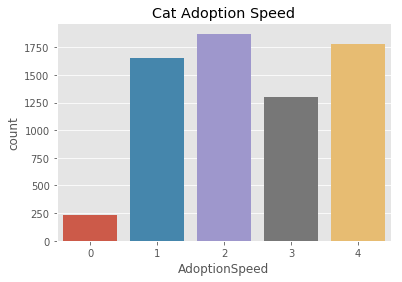

CATS
First Day  Count:  237  -- Percentage:  0.03
1-7 Days  Count:  1653  -- Percentage:  0.24
8-30 Days  Count:  1872  -- Percentage:  0.27
31-90 Days  Count:  1297  -- Percentage:  0.19
No Adoption  Count:  1775  -- Percentage:  0.26
 


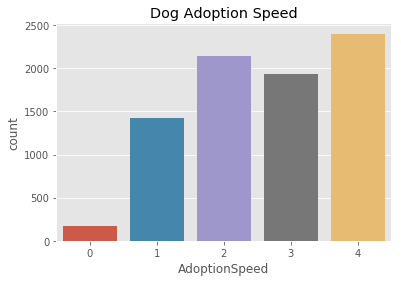

DOGS
First Day  Count:  169  -- Percentage:  0.02
1-7 Days  Count:  1426  -- Percentage:  0.18
8-30 Days  Count:  2145  -- Percentage:  0.27
31-90 Days  Count:  1936  -- Percentage:  0.24
No Adoption  Count:  2400  -- Percentage:  0.3


In [242]:
# NOT SURE ABOUT THIS TEST - ALTHOUGH ADOPTION SPEED IS ORDINAL, IT IS NOT ORDINAL THRU WHOLE DATA SET. 

sns.countplot(cat.AdoptionSpeed)
plt.title('Cat Adoption Speed')
plt.show()

print('CATS')
for i, j in adoptiondic.items():
    count = cat[cat.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(cat.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)

print(' ')

sns.countplot(dog.AdoptionSpeed)
plt.title('Dog Adoption Speed')
plt.show()

print('DOGS')
for i, j in adoptiondic.items():
    count = dog[dog.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(dog.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)

In [235]:
# Are there any differences between two types of pets, adoption speed. 
# H0 : Medians of the both groups are equal.
# Ha : Medians of the both groups are not equal.

print(stats.kruskal(cat.AdoptionSpeed, dog.AdoptionSpeed))

# There is a significant difference between 

KruskalResult(statistic=122.81621294799514, pvalue=1.5298312827684031e-28)


In [215]:
for i in dog.columns:
    print('Adoption Speed and', i, 'Crosstab for DOGS')
    print(' ')
    print(pd.crosstab(dog.AdoptionSpeed, dog[i]))
    print(' ')

Adoption Speed and AdoptionSpeed Crosstab for DOGS
 
AdoptionSpeed    0     1     2     3     4
AdoptionSpeed                             
0              169     0     0     0     0
1                0  1426     0     0     0
2                0     0  2145     0     0
3                0     0     0  1936     0
4                0     0     0     0  2400
 
Adoption Speed and Age Crosstab for DOGS
 
Age            0    1    2    3    4    5    6    7    8    9   ...   102  \
AdoptionSpeed                                                   ...         
0                3   19   44   13    6    2    5    1    1    1 ...     0   
1               24  289  399  149   67   34   30   15    9   12 ...     0   
2               25  443  633  269  101   58   32   18   40   30 ...     0   
3               19  341  480  253  122   53   56   32   35   18 ...     0   
4               12  196  423  252  177   93   98   52   70   37 ...     1   

Age            108  112  117  120  122  123  132  135  144  


zState         41324  41325  41326  41327  41330  41332  41335  41336  41342  \
AdoptionSpeed                                                                  
0                  2      1    109      5      3      1      0     11      0   
1                 10      7    879     80     42     14     10     65      1   
2                 13     19   1330    167     91     25      6     72      0   
3                  4     10   1267    137     89     24      4     58      0   
4                 56     19   1277    219     99     78     13     70      1   

zState         41345  41361  41367  41401  41415  
AdoptionSpeed                                     
0                  0      0      1     36      0  
1                  1      1      0    316      0  
2                  3      0      0    418      1  
3                  0      1      0    341      1  
4                  1      1      1    565      0  
 


# Adoption Speed and Age relation needs special care, there is a big increase among 24 months of age pets. And 1-5 months are most popular ages.

# Black and Brown colors are most popular colors. Gray and White is also favorable.

# Deworming is important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption.

# Gender is not an important criteria but Female pets are slightly favorable.

# Healthy pets are favorable.

# Medium sized dogs are popular sized pets.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of dogs.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is not so important.

# Video is not the primary criteria.

# Breed matters but since the biggest proportion is labeled as Mixed Breed, needs special care.

# There are either pet friendly states or pet available states, this needs further examination.

In [216]:
for i in cat.columns:
    print('Adoption Speed and', i, 'Crosstab for CATS')
    print(' ')
    print(pd.crosstab(cat.AdoptionSpeed, cat[i]))
    print(' ')

Adoption Speed and AdoptionSpeed Crosstab for CATS
 
AdoptionSpeed    0     1     2     3     4
AdoptionSpeed                             
0              237     0     0     0     0
1                0  1653     0     0     0
2                0     0  1872     0     0
3                0     0     0  1297     0
4                0     0     0     0  1775
 
Adoption Speed and Age Crosstab for CATS
 
Age            0    1    2    3    4    5    6    7    8    9   ...   84   \
AdoptionSpeed                                                   ...         
0                7   34   71   30   18    5   15    6    3    4 ...     1   
1               26  354  464  257  144   66   50   28   26   12 ...     3   
2               19  311  485  316  163   99   85   39   27   21 ...     3   
3               19  170  301  205  137   82   58   30   35   12 ...     4   
4               22  146  197  218  170  103  126   58   61   36 ...     5   

Age            89   92   96   108  112  120  132  144  147  


zBreed2         0    5    21   218  241  242  243  245  246  247 ...   295  \
AdoptionSpeed                                                    ...         
0               147    1    0    1    0    0    3    0    0    7 ...     0   
1              1226    0    0    0    1    2    7    1    4    6 ...     1   
2              1397    0    0    0    2    1    5    1    1    8 ...     2   
3               966    0    1    0    4    0    5    1    0    7 ...     2   
4              1378    0    0    0    3    1   10    0    0   11 ...     3   

zBreed2        296  299  300  301  302  303  304  305  306  
AdoptionSpeed                                               
0                0    3    0    0    0    1    0    0    0  
1                1   33    1    0    1    5    1    2    5  
2                0   49    2    0    0   10    0    0   13  
3                1   25    3    1    0    5    0    2    3  
4                1   28    3    0    1    3    0    2    3  

[5 rows x 55 columns]
 
A

# 1-5 months are most popular ages.

# Color preference spread among the colors.

# Deworming is not important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption. Short furs are more favorable.

# Gender is not an important criteria.

# Healthy pets are favorable.

# Medium sized cats are popular sized pets. Large sizes are less likely to be adopted.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of cats.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is important.

# Video is not the primary criteria.

# Breed matters among the cats.

# There are either pet friendly states or pet available states, this needs further examination.

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = df.AdoptionSpeed.values

X = df.drop('AdoptionSpeed', axis=1)

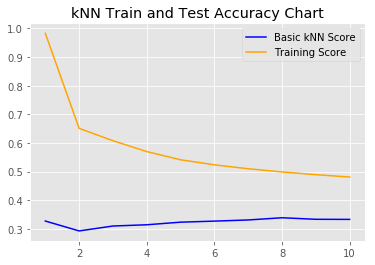

0.3272971160295104


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1618, stratify=y)

neighbor=np.arange(1,11)
knn_scr = np.empty(10)
knn_scrt = np.empty(10)
for i in range(10):
    
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    knn_scrt[i] = knn.score(X_train, y_train)
    knn_scr[i] = knn.score(X_test, y_test)
    
knn_plot = plt.plot(neighbor, knn_scr, color='blue')
knn_plot = plt.plot(neighbor, knn_scrt, color='orange')
knn_plot = plt.title('kNN Train and Test Accuracy Chart')
knn_plot = plt.legend(['Basic kNN Score', 'Training Score'])
knn_plot = plt.show()

print(knn_scr[5])


In [219]:
# Some Preliminary Random Forest
from sklearn.ensemble import RandomForestClassifier 

In [220]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

rf_score = rf.score(X_test, y_test)
print(rf_score)

C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.36619718309859156


In [221]:
#Some SVM 
from sklearn.svm import SVC

In [222]:
svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)

svc_score = svc.score(X_test, y_test)
print(svc_score)

C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.35244802146210596
